In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [3]:
company = pd.read_csv("Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
#complete company data set
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 

In [19]:
x = company.iloc[:,0:4]
y = company['ShelveLoc']

In [20]:
x
pd.set_option("display.max_rows", None) 

In [21]:
x

,Sales,CompPrice,Income,Advertising
0,9.50,138,73,11
1,11.22,111,48,16
2,10.06,113,35,10
3,7.40,117,100,4
4,4.15,141,64,3
5,10.81,124,113,13
6,6.63,115,105,0
7,11.85,136,81,15
8,6.54,132,110,0
9,4.69,132,113,0


In [22]:
y

0      0
1      1
2      2
3      2
4      0
5      0
6      2
7      1
8      2
9      2
10     0
11     1
12     2
13     1
14     1
15     2
16     1
17     1
18     1
19     2
20     2
21     1
22     2
23     2
24     0
25     1
26     1
27     2
28     0
29     0
30     1
31     2
32     1
33     1
34     2
35     2
36     1
37     2
38     2
39     0
40     0
41     0
42     2
43     2
44     2
45     0
46     2
47     0
48     0
49     1
50     0
51     0
52     0
53     2
54     2
55     2
56     2
57     0
58     0
59     2
60     0
61     2
62     0
63     2
64     2
65     2
66     2
67     2
68     1
69     2
70     1
71     2
72     2
73     1
74     2
75     0
76     2
77     2
78     2
79     0
80     0
81     1
82     1
83     0
84     0
85     2
86     2
87     1
88     2
89     2
90     2
91     2
92     2
93     2
94     0
95     2
96     1
97     0
98     1
99     0
100    2
101    2
102    2
103    0
104    2
105    2
106    2
107    2
108    0
109    2
110    2
1

In [23]:
company['ShelveLoc'].unique()

array([0, 1, 2])

In [24]:
company.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [25]:
colnames = list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [26]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

# building tree using classifier entropy

In [27]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'X[0] <= 6.165\nentropy = 1.462\nsamples = 320\nvalue = [83, 67, 170]'),
 Text(0.25, 0.625, 'X[0] <= 3.33\nentropy = 1.0\nsamples = 108\nvalue = [55, 0, 53]'),
 Text(0.125, 0.375, 'X[2] <= 56.0\nentropy = 0.503\nsamples = 18\nvalue = [16, 0, 2]'),
 Text(0.0625, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [3, 0, 2]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0, 0]'),
 Text(0.375, 0.375, 'X[2] <= 26.5\nentropy = 0.987\nsamples = 90\nvalue = [39, 0, 51]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(0.4375, 0.125, 'entropy = 0.996\nsamples = 84\nvalue = [39, 0, 45]'),
 Text(0.75, 0.625, 'X[0] <= 10.425\nentropy = 1.384\nsamples = 212\nvalue = [28, 67, 117]'),
 Text(0.625, 0.375, 'X[3] <= 15.5\nentropy = 1.281\nsamples = 160\nvalue = [25, 31, 104]'),
 Text(0.5625, 0.125, 'entropy = 1.298\nsamples = 140\nvalue = [20, 31, 89]'),
 Text(0.6875, 0.125, 'entropy = 0.811\nsamples = 20\nvalue = [5, 0, 15]'),
 Text(0.875, 0

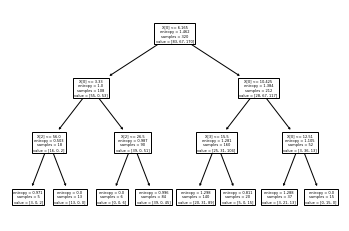

In [28]:
tree.plot_tree(model)

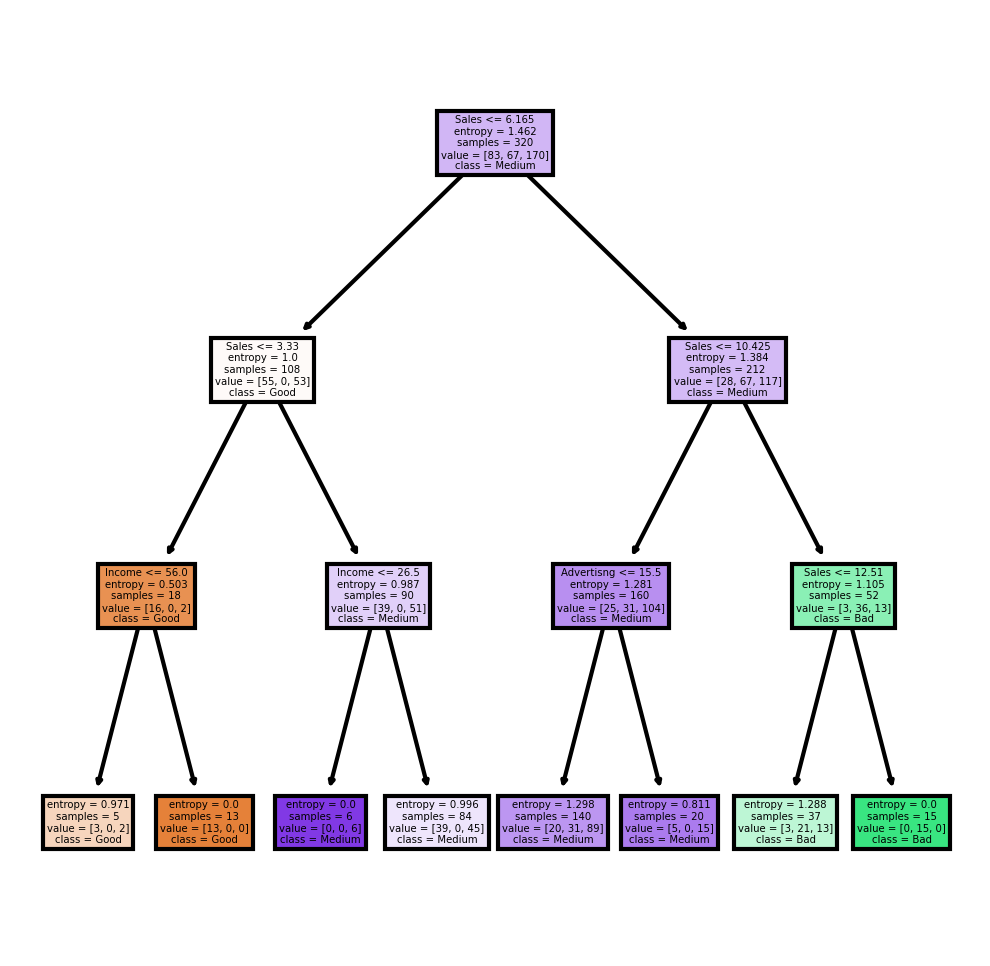

In [29]:
fn=['Sales','CompPrice','Income','Advertisng','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Good', 'Bad', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [33]:
model.feature_importances_

array([0.87752091, 0.        , 0.06997425, 0.05250485])

In [34]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=cn).sort_values(ascending=True) 
feature_imp

ValueError: Length of values (4) does not match length of index (3)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

NameError: name 'feature_imp' is not defined

In [35]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor 

In [36]:
array =company.values
X = array[:,0:3]
y = array[:,3] 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

In [38]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [39]:
model.score(X_test,y_test)

-1.2303248876799415

# decission tree for the crime data

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [43]:
df1=pd.read_csv("Fraud_check.csv")
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


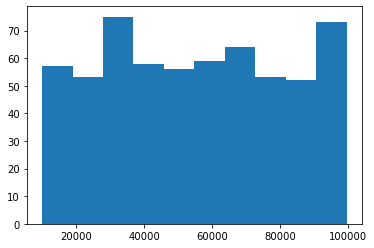

In [44]:
plt.hist(df1['Taxable.Income'])
plt.show()

In [47]:
label_encoder = preprocessing.LabelEncoder()
df1['Taxable.Income']= label_encoder.fit_transform(df1['Taxable.Income'])

In [50]:
x = df1.iloc[:,0:4]
y = df1['Taxable.Income']

In [52]:
x
pd.set_option("display.max_rows",None)

In [53]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population
0,NO,Single,387,50047
1,YES,Divorced,163,134075
2,NO,Married,186,160205
3,YES,Single,272,193264
4,NO,Married,468,27533
5,NO,Divorced,158,116382
6,NO,Divorced,483,80890
7,YES,Single,350,131253
8,NO,Single,485,102481
9,YES,Divorced,581,155482


In [54]:
y

0      387
1      163
2      186
3      272
4      468
5      158
6      483
7      350
8      485
9      581
10     121
11     336
12      13
13     341
14     359
15     394
16      89
17     206
18     578
19      11
20     516
21      29
22     454
23     537
24     192
25     132
26     300
27     513
28       5
29     552
30     427
31     358
32     572
33     477
34      21
35     130
36       2
37     382
38      33
39     429
40     277
41     265
42     568
43     398
44     162
45     470
46     135
47     236
48      42
49     242
50     462
51     209
52     577
53      72
54     476
55      62
56     171
57     448
58       8
59     366
60     556
61     102
62     534
63     280
64     345
65     319
66     226
67     340
68       1
69     598
70     522
71     554
72     216
73     217
74     144
75     337
76     376
77     133
78     424
79       3
80     240
81     175
82     371
83     510
84     391
85     110
86     203
87      27
88     505
89      99
90     444

In [55]:
df1['Taxable.Income'].unique()

array([387, 163, 186, 272, 468, 158, 483, 350, 485, 581, 121, 336,  13,
       341, 359, 394,  89, 206, 578,  11, 516,  29, 454, 537, 192, 132,
       300, 513,   5, 552, 427, 358, 572, 477,  21, 130,   2, 382,  33,
       429, 277, 265, 568, 398, 162, 470, 135, 236,  42, 242, 462, 209,
       577,  72, 476,  62, 171, 448,   8, 366, 556, 102, 534, 280, 345,
       319, 226, 340,   1, 598, 522, 554, 216, 217, 144, 337, 376, 133,
       424,   3, 240, 175, 371, 510, 391, 110, 203,  27, 505,  99, 444,
       597, 500,  34,   4, 218,  78, 460,  77, 287, 543, 173, 148, 520,
       220, 302,  58, 247, 284, 392,  88, 446, 566, 526,  73, 456, 229,
       297, 123, 573, 285,  65,  69,  98, 403, 509,  40, 433, 580, 292,
       548, 307, 250, 160, 176,  20, 293,  79, 491, 270, 109, 312, 328,
       100, 458, 166, 489, 354, 232, 210, 463, 375,  75,  53,  91, 323,
       201, 261, 111, 346, 511, 549, 308, 103, 262, 529, 266, 214,  54,
       439, 586,  67,  25, 493, 238, 200, 198, 584, 508, 116, 41

In [58]:
colnames = list(df1.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [61]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [68]:
df1(Taxable.Income).value_counts()

NameError: name 'Taxable' is not defined

In [65]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train,y_train)

ValueError: could not convert string to float: 'YES'